### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('public_flights.csv')
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,235.0,1448,320,0


### Basic data wrangling and visualizations

In [3]:
# The only null values are into the tail number, which is an unimportant identifier. We will make sure to exclude that column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838858 entries, 0 to 838857
Data columns (total 14 columns):
YEAR                   838858 non-null int64
MONTH                  838858 non-null int64
DAY                    838858 non-null int64
DAY_OF_WEEK            838858 non-null int64
AIRLINE                838858 non-null object
FLIGHT_NUMBER          838858 non-null int64
TAIL_NUMBER            832877 non-null object
ORIGIN_AIRPORT         838858 non-null object
DESTINATION_AIRPORT    838858 non-null object
SCHEDULED_DEPARTURE    838858 non-null int64
SCHEDULED_TIME         838856 non-null float64
DISTANCE               838858 non-null int64
SCHEDULED_ARRIVAL      838858 non-null int64
CANCELLED              838858 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 89.6+ MB


In [4]:
df1 = df.drop(['FLIGHT_NUMBER'], axis = 1) 

In [5]:
df1 = df1.drop(['TAIL_NUMBER'], axis = 1)

In [6]:
df1.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
count,838858.0,838858.000000,838858.000000,838858.000000,838858.000000,838856.000000,838858.000000,838858.000000,838858.000000
mean,2015.0,1.439753,14.450286,3.931496,1322.621184,140.122972,801.774485,1506.292963,0.034192
std,0.0,0.496357,8.285212,1.999075,469.070976,74.623598,594.034243,484.293134,0.181721
min,2015.0,1.000000,1.000000,1.000000,5.000000,20.000000,31.000000,1.000000,0.000000
25%,2015.0,1.000000,7.000000,2.000000,925.000000,85.000000,366.000000,1123.000000,0.000000
50%,2015.0,1.000000,14.000000,4.000000,1320.000000,121.000000,641.000000,1525.000000,0.000000
75%,2015.0,2.000000,21.000000,6.000000,1720.000000,173.000000,1045.000000,1915.000000,0.000000
max,2015.0,2.000000,31.000000,7.000000,2359.000000,718.000000,4983.000000,2359.000000,1.000000


#### Only 2015, Months Jan and February all the days of the month and week. It is also a very unbalanced dataset

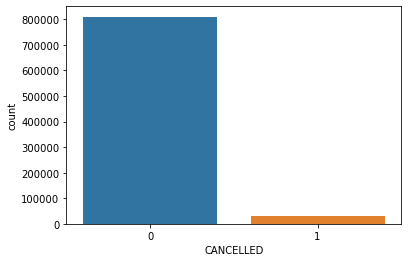

In [7]:
### How many flights got cancelled ? Highly unbalanced, dataset! 95% of the flights were not cancelled
sns.countplot(df1['CANCELLED'])
plt.show()
#df1['CANCELLED'].value_counts(normalize = True).plot(kind='bar')

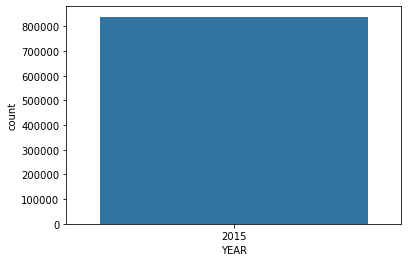

In [8]:
sns.countplot(df1['YEAR'])
plt.show()

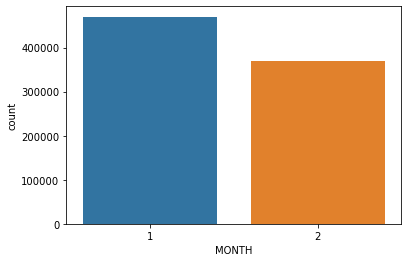

In [9]:
sns.countplot(df1['MONTH'])
plt.show()

#### What are the distributions of the other numerical variables? They all seem evenly spread out except some expected skewed ones for scheduled times and distance

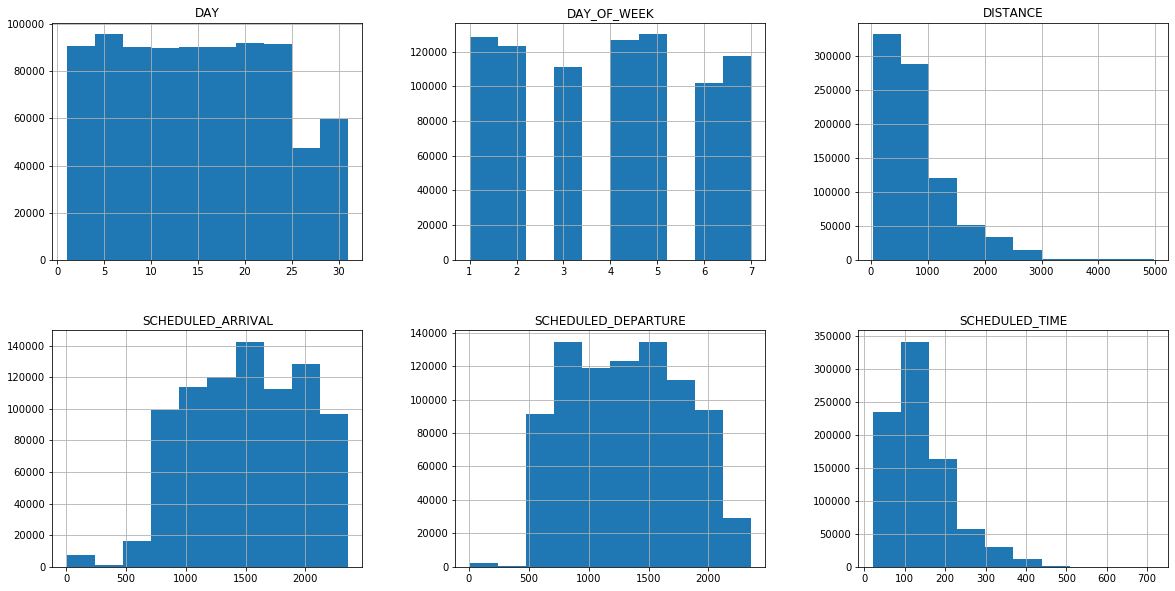

In [10]:
## Year distribution?

columns = ['DAY', 'DAY_OF_WEEK','DISTANCE','SCHEDULED_ARRIVAL','SCHEDULED_DEPARTURE', 'SCHEDULED_TIME']

df[columns].hist(figsize=(20, 10), layout=(2,3));

#### How many flights belong to each airline ?

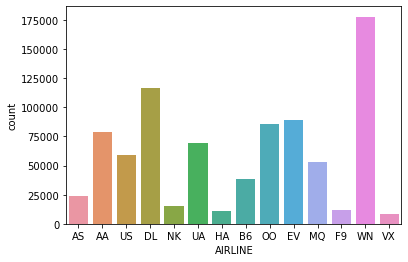

In [11]:
sns.countplot(df1['AIRLINE'])
plt.show()

#### What is the trend of cancelled and not cancelled flights for each airline? Who has the most cancelled flights in total and as a percentage of flights scheduled?

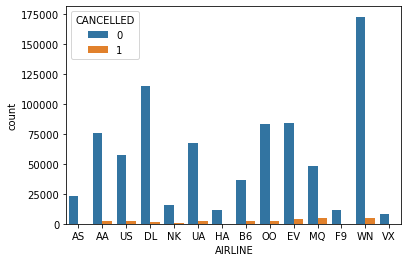

In [12]:
ax = sns.countplot(x="AIRLINE", hue="CANCELLED", data=df1)
## WN, MQ, EV have the highest count of cancelled flights

In [13]:
## EV, B6, MQ have the highest proportions of flights cancelled
canc = df1.groupby(["AIRLINE",'CANCELLED'])['CANCELLED'].count()
canc.groupby(level=[0]).apply(lambda g: g / g.sum())

AIRLINE  CANCELLED
AA       0            0.967958
         1            0.032042
AS       0            0.993852
         1            0.006148
B6       0            0.938583
         1            0.061417
DL       0            0.983867
         1            0.016133
EV       0            0.952075
         1            0.047925
F9       0            0.983895
         1            0.016105
HA       0            0.997457
         1            0.002543
MQ       0            0.901891
         1            0.098109
NK       0            0.979991
         1            0.020009
OO       0            0.970869
         1            0.029131
UA       0            0.971926
         1            0.028074
US       0            0.962835
         1            0.037165
VX       0            0.972252
         1            0.027748
WN       0            0.972516
         1            0.027484
Name: CANCELLED, dtype: float64

#### Where are most flights starting from (top 10) ? What about the destination?

In [14]:
df1.ORIGIN_AIRPORT.value_counts()[:10]

ATL    52929
ORD    42155
DFW    41063
LAX    30867
DEN    30454
IAH    23847
PHX    23331
SFO    22819
LAS    20706
MCO    17974
Name: ORIGIN_AIRPORT, dtype: int64

In [15]:
df1.DESTINATION_AIRPORT.value_counts()[:10]

ATL    53079
ORD    42288
DFW    41164
LAX    30859
DEN    30475
IAH    23913
PHX    23354
SFO    22821
LAS    20694
MCO    17976
Name: DESTINATION_AIRPORT, dtype: int64

In [16]:
df1.DESTINATION_AIRPORT.value_counts()[-10:]

ADQ    54
MQT    47
ILG    43
BGM    34
OTH    31
UST    27
BGR    17
PPG    17
ADK    16
ITH     5
Name: DESTINATION_AIRPORT, dtype: int64

#### What is the distribution of departure scheduled flights that were cancelled and not for the top 30 airports in size?

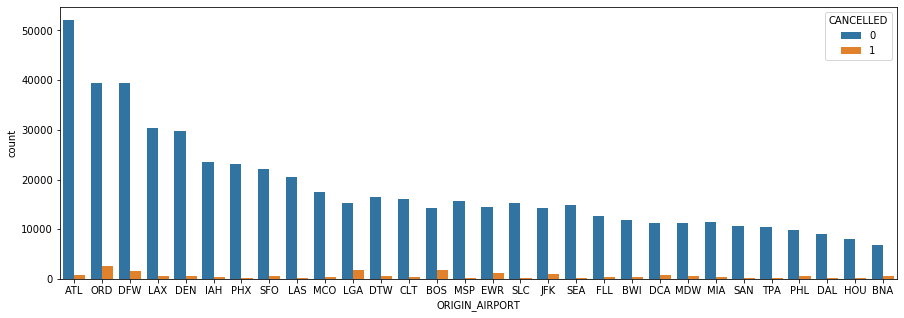

In [17]:
import seaborn as sns
plt.figure(figsize= (15,5))

sns.countplot(x="ORIGIN_AIRPORT", hue="CANCELLED", data=df1, 
              order=df1.ORIGIN_AIRPORT.value_counts().iloc[:30].index)

#### What is the distribution of arrival flights that were cancelled and not for the top 30 airports in size?

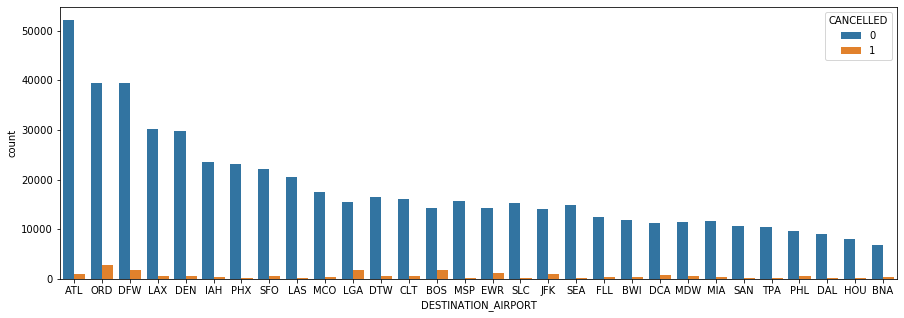

In [18]:
import seaborn as sns
plt.figure(figsize= (15,5))

sns.countplot(x="DESTINATION_AIRPORT", hue="CANCELLED", data=df1, 
              order=df1.ORIGIN_AIRPORT.value_counts().iloc[:30].index)

#### What about for the 30 smallest airports? (depatures and arrivals)

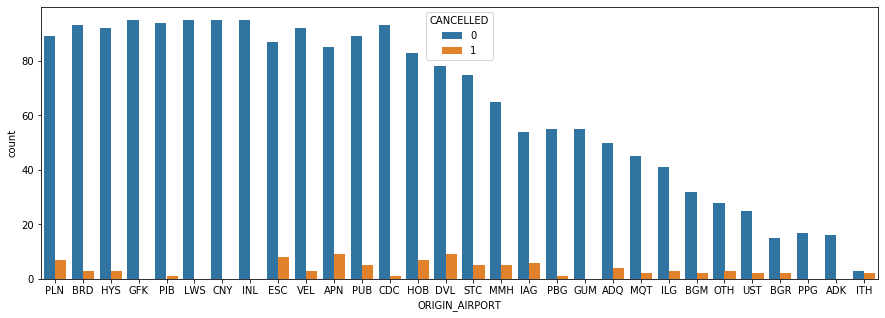

In [19]:
import seaborn as sns
plt.figure(figsize= (15,5))

sns.countplot(x="ORIGIN_AIRPORT", hue="CANCELLED", data=df1, 
              order=df1.ORIGIN_AIRPORT.value_counts().iloc[-30:].index)

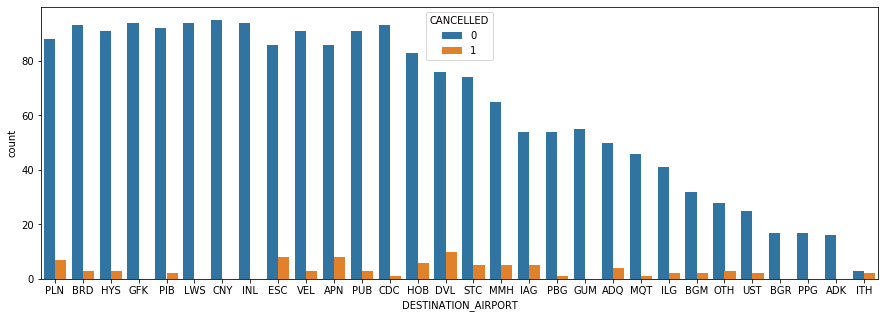

In [20]:
import seaborn as sns
plt.figure(figsize= (15,5))

sns.countplot(x="DESTINATION_AIRPORT", hue="CANCELLED", data=df1, 
              order=df1.ORIGIN_AIRPORT.value_counts().iloc[-30:].index)

In [21]:
df1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED
0,2015,1,1,4,AS,ANC,SEA,5,205.0,1448,430,0
1,2015,1,1,4,AA,LAX,PBI,10,280.0,2330,750,0
2,2015,1,1,4,US,SFO,CLT,20,286.0,2296,806,0
3,2015,1,1,4,AA,LAX,MIA,20,285.0,2342,805,0
4,2015,1,1,4,AS,SEA,ANC,25,235.0,1448,320,0


### Data preparation for ML model

#### Correlation Matrix

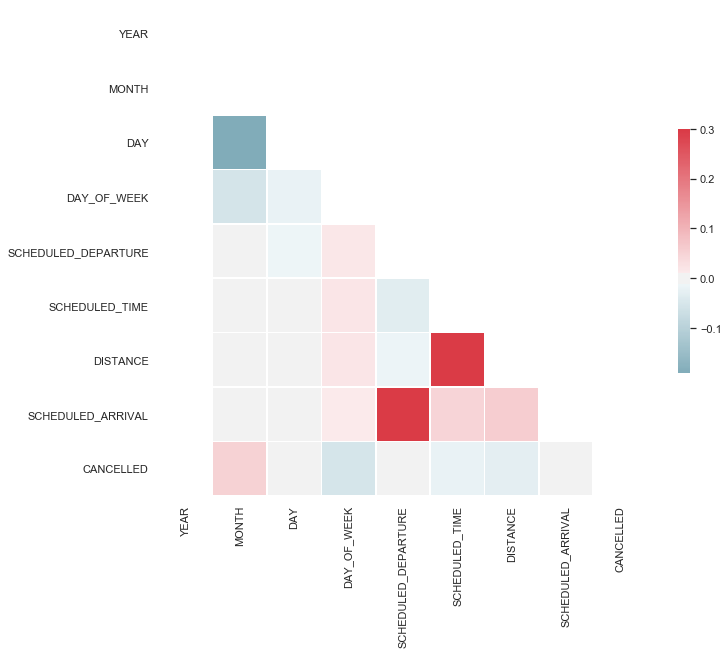

In [22]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### To avoid redundancy and correlation, I will drop the distance and scheduled arrival. The scheduled time and scheduled depature will be representing the information fairly well

In [23]:
df1 = df1.drop(['SCHEDULED_ARRIVAL'], axis = 1)

In [24]:
df1 = df1.drop(['DISTANCE'], axis = 1)

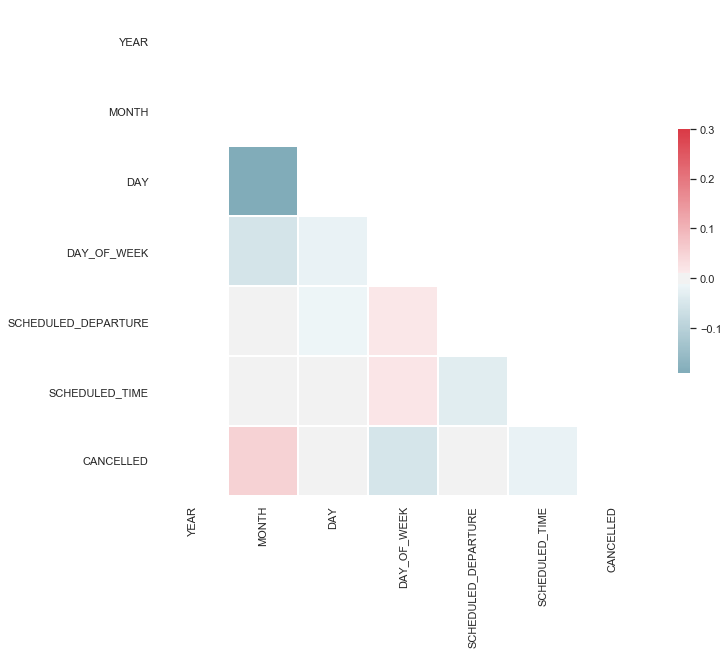

In [25]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### EDA : CLUSTER the airports based on count of flights taking off and arriving to reduce the number of features

In [26]:
df1.ORIGIN_AIRPORT.value_counts()[:10].std()

11342.935052759101

In [27]:
df1.ORIGIN_AIRPORT.value_counts()[:10].mean()

30614.5

In [28]:
df1.ORIGIN_AIRPORT.value_counts()[:10].median()

27150.5

In [29]:
df1.ORIGIN_AIRPORT.value_counts().quantile(q=1)

52929.0

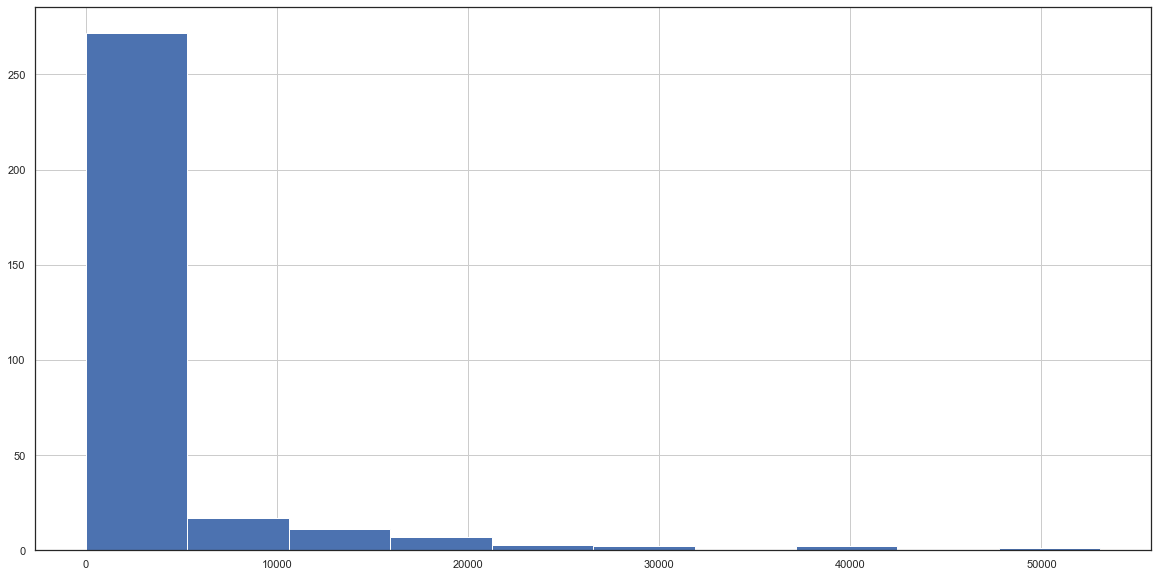

In [30]:
df1.DESTINATION_AIRPORT.value_counts().hist(figsize=(20, 10),)

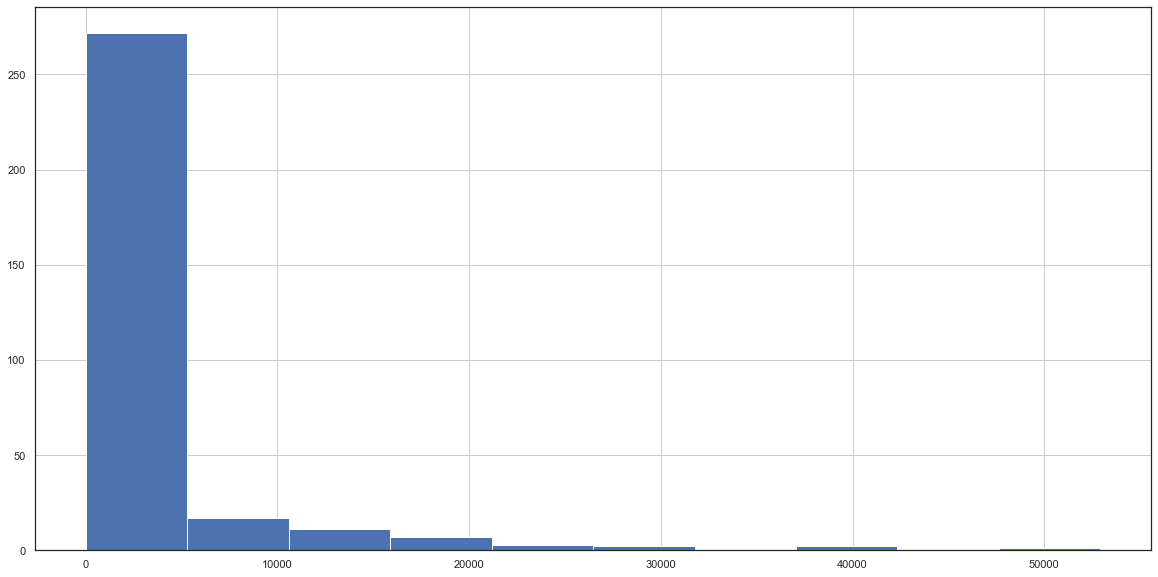

In [31]:
df1.ORIGIN_AIRPORT.value_counts().hist(figsize=(20, 10),)

In [32]:
def func(x):
    if x < df1.ORIGIN_AIRPORT.value_counts().quantile(q=0.20):
        return 1
    elif x < df1.ORIGIN_AIRPORT.value_counts().quantile(q=0.4) :
        return 2
    elif x < df1.ORIGIN_AIRPORT.value_counts().quantile(q=0.6):
        return 3
    
    elif x < df1.ORIGIN_AIRPORT.value_counts().quantile(q=0.8):
        return 4
    else:
        return 5

In [33]:
def funct(x):
    if x < df1.DESTINATION_AIRPORT.value_counts().quantile(q=0.20):
        return 1
    elif x < df1.DESTINATION_AIRPORT.value_counts().quantile(q=0.4) :
        return 2
    elif x < df1.DESTINATION_AIRPORT.value_counts().quantile(q=0.6):
        return 3
    elif x < df1.DESTINATION_AIRPORT.value_counts().quantile(q=0.8):
        return 4
    else:
        return 5

In [34]:
df1.DESTINATION_AIRPORT.value_counts()

ATL    53079
ORD    42288
DFW    41164
LAX    30859
DEN    30475
IAH    23913
PHX    23354
SFO    22821
LAS    20694
MCO    17976
LGA    17235
DTW    17013
CLT    16524
BOS    16033
MSP    16009
EWR    15647
SLC    15406
JFK    15116
SEA    15058
FLL    12905
BWI    12269
DCA    12046
MDW    11966
MIA    11867
SAN    10789
TPA    10641
PHL    10273
DAL     9211
HOU     8266
BNA     7259
       ...  
BRD       96
CNY       95
PLN       95
HYS       94
GFK       94
VEL       94
CDC       94
PIB       94
LWS       94
INL       94
APN       94
PUB       94
ESC       94
HOB       89
DVL       86
STC       79
MMH       70
IAG       59
PBG       55
GUM       55
ADQ       54
MQT       47
ILG       43
BGM       34
OTH       31
UST       27
BGR       17
PPG       17
ADK       16
ITH        5
Name: DESTINATION_AIRPORT, Length: 315, dtype: int64

In [35]:
df1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,CANCELLED
0,2015,1,1,4,AS,ANC,SEA,5,205.0,0
1,2015,1,1,4,AA,LAX,PBI,10,280.0,0
2,2015,1,1,4,US,SFO,CLT,20,286.0,0
3,2015,1,1,4,AA,LAX,MIA,20,285.0,0
4,2015,1,1,4,AS,SEA,ANC,25,235.0,0


#### Based on the 'quartile position' of whole group of airports' depatures and arrivals, I will assign a number to each of them - from 1 to 5, smallest to largest airport for both origin airport and destination airport column 

In [36]:
f1 = df1.ORIGIN_AIRPORT.value_counts().apply(func)

In [37]:
f2 = df1.DESTINATION_AIRPORT.value_counts().apply(funct)

In [38]:
f1 = pd.DataFrame(f1).reset_index()
f2 = pd.DataFrame(f2).reset_index()

In [39]:
df1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,CANCELLED
0,2015,1,1,4,AS,ANC,SEA,5,205.0,0
1,2015,1,1,4,AA,LAX,PBI,10,280.0,0
2,2015,1,1,4,US,SFO,CLT,20,286.0,0
3,2015,1,1,4,AA,LAX,MIA,20,285.0,0
4,2015,1,1,4,AS,SEA,ANC,25,235.0,0


In [40]:
df1 =  pd.merge(df1, f1, left_on= ['ORIGIN_AIRPORT'], right_on = 'index', how = 'inner')

In [41]:
df1['ORIGIN'] = df1['ORIGIN_AIRPORT_y']

In [42]:
df1 =  pd.merge(df1, f2, left_on= ['DESTINATION_AIRPORT'], right_on = 'index',  how = 'inner')

In [43]:
df1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT_x,DESTINATION_AIRPORT_x,SCHEDULED_DEPARTURE,SCHEDULED_TIME,CANCELLED,index_x,ORIGIN_AIRPORT_y,ORIGIN,index_y,DESTINATION_AIRPORT_y
0,2015,1,1,4,AS,ANC,SEA,5,205.0,0,ANC,4,4,SEA,5
1,2015,1,1,4,AS,ANC,SEA,45,204.0,0,ANC,4,4,SEA,5
2,2015,1,1,4,DL,ANC,SEA,45,210.0,0,ANC,4,4,SEA,5
3,2015,1,1,4,AS,ANC,SEA,135,205.0,1,ANC,4,4,SEA,5
4,2015,1,1,4,AS,ANC,SEA,155,218.0,0,ANC,4,4,SEA,5


In [44]:
df1.dropna()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT_x,DESTINATION_AIRPORT_x,SCHEDULED_DEPARTURE,SCHEDULED_TIME,CANCELLED,index_x,ORIGIN_AIRPORT_y,ORIGIN,index_y,DESTINATION_AIRPORT_y
0,2015,1,1,4,AS,ANC,SEA,5,205.0,0,ANC,4,4,SEA,5
1,2015,1,1,4,AS,ANC,SEA,45,204.0,0,ANC,4,4,SEA,5
2,2015,1,1,4,DL,ANC,SEA,45,210.0,0,ANC,4,4,SEA,5
3,2015,1,1,4,AS,ANC,SEA,135,205.0,1,ANC,4,4,SEA,5
4,2015,1,1,4,AS,ANC,SEA,155,218.0,0,ANC,4,4,SEA,5
5,2015,1,1,4,AS,ANC,SEA,220,200.0,0,ANC,4,4,SEA,5
6,2015,1,1,4,AS,ANC,SEA,505,205.0,0,ANC,4,4,SEA,5
7,2015,1,1,4,AS,ANC,SEA,700,210.0,0,ANC,4,4,SEA,5
8,2015,1,1,4,AS,ANC,SEA,1035,207.0,0,ANC,4,4,SEA,5
9,2015,1,1,4,AS,ANC,SEA,1340,195.0,0,ANC,4,4,SEA,5


In [45]:
df1['DESTINATION'] = df1['DESTINATION_AIRPORT_y']

In [46]:
df1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT_x,DESTINATION_AIRPORT_x,SCHEDULED_DEPARTURE,SCHEDULED_TIME,CANCELLED,index_x,ORIGIN_AIRPORT_y,ORIGIN,index_y,DESTINATION_AIRPORT_y,DESTINATION
0,2015,1,1,4,AS,ANC,SEA,5,205.0,0,ANC,4,4,SEA,5,5
1,2015,1,1,4,AS,ANC,SEA,45,204.0,0,ANC,4,4,SEA,5,5
2,2015,1,1,4,DL,ANC,SEA,45,210.0,0,ANC,4,4,SEA,5,5
3,2015,1,1,4,AS,ANC,SEA,135,205.0,1,ANC,4,4,SEA,5,5
4,2015,1,1,4,AS,ANC,SEA,155,218.0,0,ANC,4,4,SEA,5,5


In [47]:
df1 = df1[['MONTH','DAY', 'DAY_OF_WEEK','AIRLINE' ,'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'ORIGIN','DESTINATION' , 'CANCELLED']]

### Model preparation : Get dummy variable for airline, transform in numpy and apply the standard scaler

In [48]:
#Mjob, Fjob, reason, guardian

pt_dummies4 = pd.get_dummies(df1.AIRLINE)

df11 = pd.concat([pt_dummies4,df1 ], axis=1)
df11 = df11.drop(['AS'], axis = 1)

In [49]:
df11 = df11.dropna()

In [50]:
df11.head()

,AA,B6,DL,EV,F9,HA,MQ,NK,OO,UA,...,WN,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_TIME,ORIGIN,DESTINATION,CANCELLED
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,4,AS,5,205.0,4,5,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,4,AS,45,204.0,4,5,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,4,DL,45,210.0,4,5,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,4,AS,135,205.0,4,5,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,4,AS,155,218.0,4,5,0


In [51]:
df11 = df11.drop(['AIRLINE'], axis = 1)

In [52]:
#df11 = df11[['MONTH','DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'ORIGIN','DESTINATION' , 'CANCELLED']]

In [53]:
y1 = df11['CANCELLED'].values

In [54]:
df11 = df11.drop(['CANCELLED'], axis = 1)

In [55]:
df11.head()

,AA,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,ORIGIN,DESTINATION
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,5,205.0,4,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,45,204.0,4,5
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,4,45,210.0,4,5
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,135,205.0,4,5
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,155,218.0,4,5


In [56]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

In [57]:
#y1 = df11['CANCELLED'].values
X1 =  df11.values

In [58]:
X1

array([[  0.,   0.,   0., ..., 205.,   4.,   5.],
       [  0.,   0.,   0., ..., 204.,   4.,   5.],
       [  0.,   0.,   1., ..., 210.,   4.,   5.],
       ...,
       [  0.,   0.,   0., ...,  24.,   1.,   1.],
       [  0.,   0.,   0., ...,  24.,   1.,   1.],
       [  0.,   0.,   0., ...,  24.,   1.,   1.]])

In [59]:
X1= preprocessing.StandardScaler().fit(X1).transform(X1)

### Modeling : train, test, validation splits 

In [60]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.1, random_state=4)

In [61]:
from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train1, y_val1 = train_test_split( X_train1, y_train1, test_size=0.1, random_state=4)

#### Use of SMOTE to balance the classes

In [62]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=12, sampling_strategy=0.5)
X_train_res1, y_train_res1 = sm.fit_sample(X_train1, y_train1)

#### Model 1 : Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR1_model = LogisticRegression().fit(X_train_res1, y_train_res1)

In [64]:
from sklearn.metrics import recall_score

In [65]:
print('Validation Results')
print(LR1_model.score(X_val1, y_val1))
print(recall_score(y_val1, LR1_model.predict(X_val1)))
print('Test Results')
print(LR1_model.score(X_test1, y_test1))
print(recall_score(y_test1, LR1_model.predict(X_test1)))

Validation Results
0.8922738651866962
0.24503311258278146
Test Results
0.8926638533247503
0.2555396711937098


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,LR1_model.predict(X_test1))

print(cm)

[[74167  6921]
 [ 2083   715]]


In [67]:
# get importance
from matplotlib import pyplot

importance = LR1_model.coef_[0]
# summarize feature importance
indices = np.argsort(importance)[::-1]

values = list(df11.columns.values)

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print(("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]])),values[f])

Feature ranking:
1. feature 6 (0.718026) AA
2. feature 3 (0.646754) B6
3. feature 12 (0.619563) DL
4. feature 8 (0.507222) EV
5. feature 1 (0.497060) F9
6. feature 0 (0.488878) HA
7. feature 10 (0.472952) MQ
8. feature 9 (0.426615) NK
9. feature 2 (0.339616) OO
10. feature 13 (0.314543) UA
11. feature 7 (0.171145) US
12. feature 11 (0.139855) VX
13. feature 4 (0.114682) WN
14. feature 19 (0.028528) MONTH
15. feature 14 (0.028468) DAY
16. feature 16 (0.000394) DAY_OF_WEEK
17. feature 17 (-0.002391) SCHEDULED_DEPARTURE
18. feature 18 (-0.008548) SCHEDULED_TIME
19. feature 5 (-0.096977) ORIGIN
20. feature 15 (-0.260190) DESTINATION


In [68]:
### AA, 

Feature: 0, Score: 0.48888
Feature: 1, Score: 0.49706
Feature: 2, Score: 0.33962
Feature: 3, Score: 0.64675
Feature: 4, Score: 0.11468
Feature: 5, Score: -0.09698
Feature: 6, Score: 0.71803
Feature: 7, Score: 0.17115
Feature: 8, Score: 0.50722
Feature: 9, Score: 0.42662
Feature: 10, Score: 0.47295
Feature: 11, Score: 0.13986
Feature: 12, Score: 0.61956
Feature: 13, Score: 0.31454
Feature: 14, Score: 0.02847
Feature: 15, Score: -0.26019
Feature: 16, Score: 0.00039
Feature: 17, Score: -0.00239
Feature: 18, Score: -0.00855
Feature: 19, Score: 0.02853


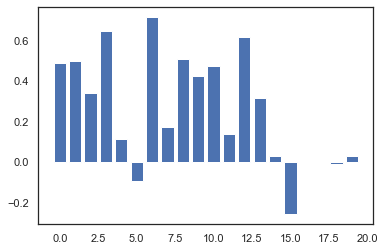

In [69]:
# get importance
from matplotlib import pyplot

importance = LR1_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Model 2 : Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier()
RF1.fit(X_train_res1, y_train_res1)

RandomForestClassifier()

In [71]:
print('Validation Results')
print(RF1.score(X_val1, y_val1))
print(recall_score(y_val1, RF1.predict(X_val1)))
print('Test Results')
print(RF1.score(X_test1, y_test1))
print(recall_score(y_test1, RF1.predict(X_test1)))

Validation Results
0.936898154893572
0.3646279703934554
Test Results
0.938046873137353
0.38205861329521085


In [72]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test1,RF1.predict(X_test1))
print(cm2)

[[77620  3468]
 [ 1729  1069]]


Feature ranking:
1. feature 16 (0.230506) AA
2. feature 17 (0.218296) B6
3. feature 14 (0.210694) DL
4. feature 15 (0.162431) EV
5. feature 13 (0.036024) F9
6. feature 6 (0.033080) HA
7. feature 18 (0.019574) MQ
8. feature 19 (0.018301) NK
9. feature 2 (0.010607) OO
10. feature 8 (0.009922) UA
11. feature 1 (0.009091) US
12. feature 12 (0.008712) VX
13. feature 3 (0.008158) WN
14. feature 0 (0.006699) MONTH
15. feature 10 (0.005807) DAY
16. feature 9 (0.004373) DAY_OF_WEEK
17. feature 5 (0.002403) SCHEDULED_DEPARTURE
18. feature 7 (0.002096) SCHEDULED_TIME
19. feature 4 (0.001835) ORIGIN
20. feature 11 (0.001389) DESTINATION


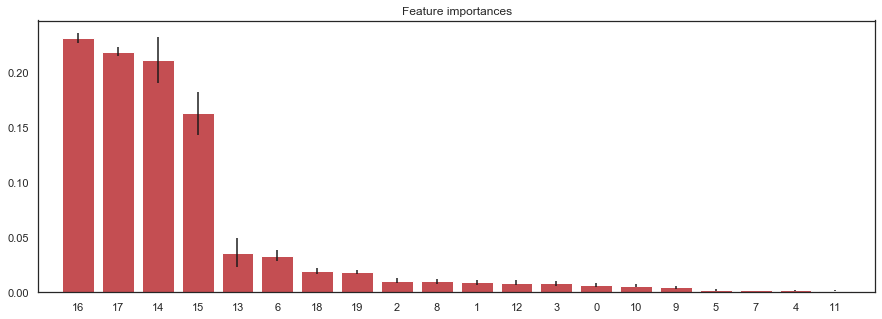

In [73]:
importances = RF1.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
values = list(df11.columns.values)

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print(("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])), values[f])

# Plot the feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])
plt.show()

#### Model 3 : XG Boost classifier

In [74]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X1,label=y1)
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', seed=42)
eval_set = [(X_train_res1, y_train_res1), (X_val1, y_val1)]
xg_reg.fit(X_train_res1, y_train_res1,early_stopping_rounds=45, eval_metric=['auc','logloss'],eval_set=eval_set, verbose=True )

[0]	validation_0-auc:0.82908	validation_0-logloss:0.58954	validation_1-auc:0.78263	validation_1-logloss:0.55218
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 45 rounds.
[1]	validation_0-auc:0.83860	validation_0-logloss:0.53525	validation_1-auc:0.79309	validation_1-logloss:0.47257
[2]	validation_0-auc:0.85181	validation_0-logloss:0.49944	validation_1-auc:0.80823	validation_1-logloss:0.42002
[3]	validation_0-auc:0.86283	validation_0-logloss:0.47252	validation_1-auc:0.81788	validation_1-logloss:0.38262
[4]	validation_0-auc:0.86633	validation_0-logloss:0.45619	validation_1-auc:0.82151	validation_1-logloss:0.35769
[5]	validation_0-auc:0.87413	validation_0-logloss:0.44184	validation_1-auc:0.82762	validation_1-logloss:0.33884
[6]	validation_0-auc:0.88011	validation_0-logloss:0.43179	validation_1-auc:0.83205	validation_1-logloss:0.32495
[7]	validation_0-auc:0.88333	validation_0-logloss:0

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [75]:
#Choose all predictors except target & IDcols
#predictors = [x for x in X_train_res.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.3,
 n_estimators=100,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=1,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_train_res1,y_train_res1)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [76]:
print('Validation Results')
print(xgb1.score(X_val1, y_val1))
print(recall_score(y_val1, xgb1.predict(X_val1)))
print('Test Results')
print(xgb1.score(X_test1, y_test1))
print(recall_score(y_test1, xgb1.predict(X_test1)))

Validation Results
0.9423420798177411
0.37125048694974677
Test Results
0.9419927043845219
0.3902787705503931


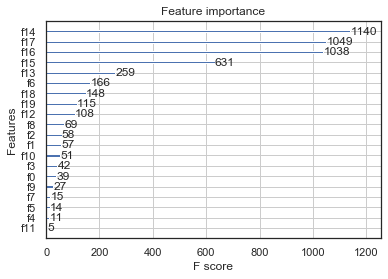

In [77]:
xgb.plot_importance(xgb1)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

In [78]:
#What airline has most cancellations/what has the least?
#What are the top cancellation factors?
#do LR with grid search
#cluster the airports based on numbers of flight!
#what are the common features?
#how do the result change by clustering the airports by flight size?
